In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np

Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Visualize the dataset

Target labels:  [0 8 1 9 7 5 1 4 0 1]


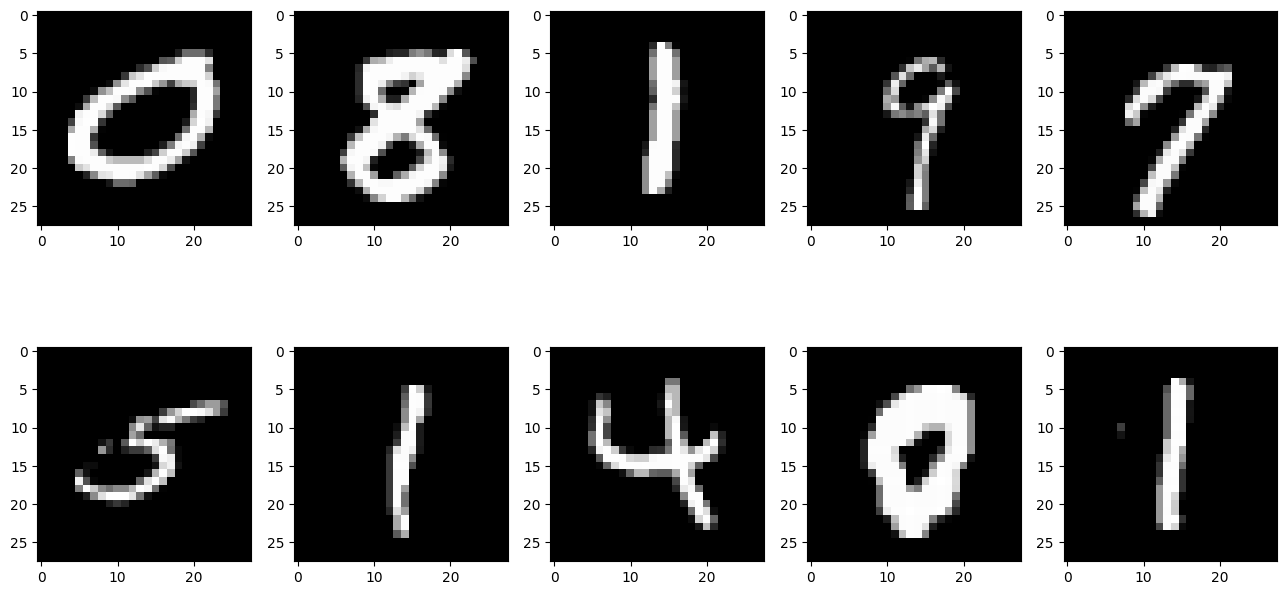

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2837 - accuracy: 0.9165
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1305 - accuracy: 0.9604
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0950 - accuracy: 0.9708
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0762 - accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0628 - accuracy: 0.9804
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0537 - accuracy: 0.9829
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0478 - accuracy: 0.9843
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0397 - accuracy: 0.9873
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0357 - accuracy: 0.9882
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.03

Plot the loss and accuracy graphs

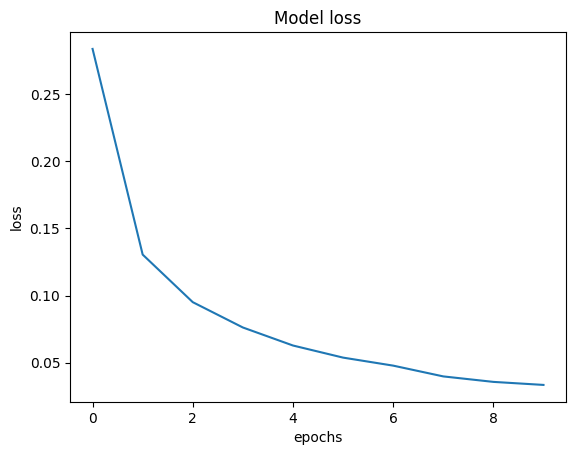

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

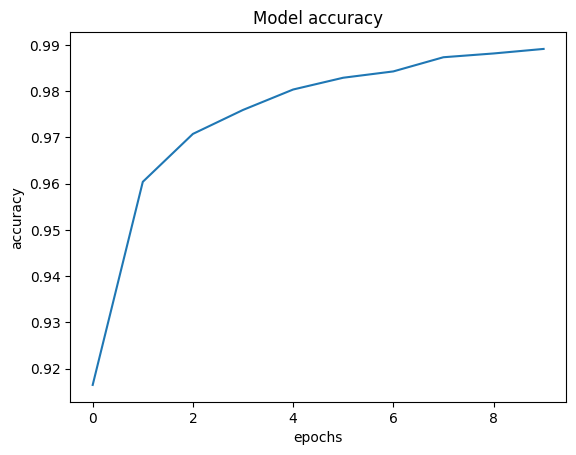

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.1177 - accuracy: 0.9697
Loss of the Test dataset is: 0.11768448352813721
Accuracy of the test dataset is: 0.9696999788284302


Save the model weights

In [11]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))

l1_l2_regularizer = l1_l2(l1=0.001, l2=0.001)
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

313/313 [==============================] - 1s 1ms/step


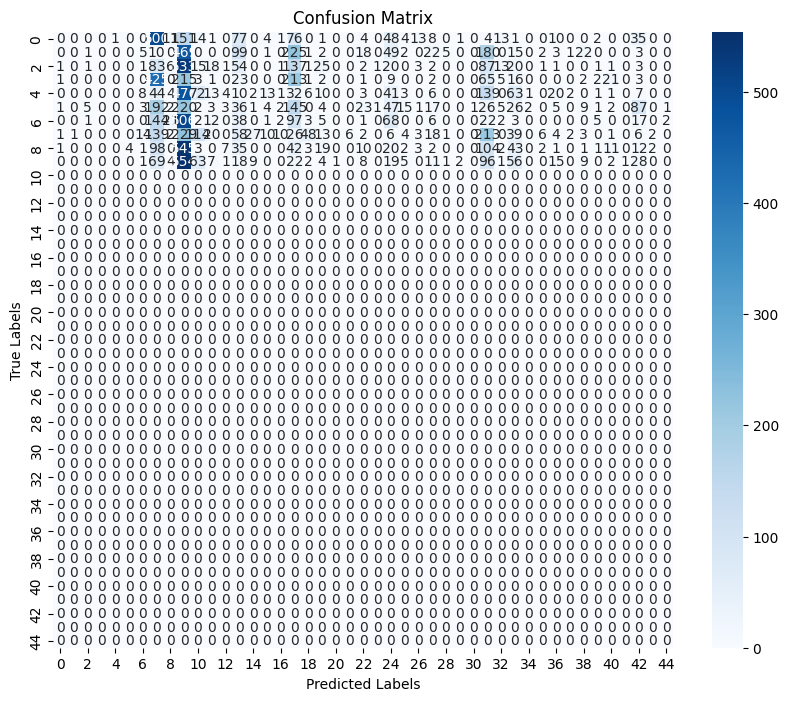

In [14]:
predictions = model.predict(new_test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(new_test_target, axis=1)

confusion = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()